<a href="https://colab.research.google.com/github/vedantsuryawanshi7/Bharat-Intern-Data-Science-/blob/main/Cats_%26_Dogs_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cats & Dogs Image Classifier

*   Author :- Vedant Keda Suryawanshi
*   Domain :- Data Science
*   Batch :- Feb

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:04<00:00, 221MB/s]
100% 1.06G/1.06G [00:04<00:00, 245MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten,BatchNormalization,MaxPooling2D,Dropout

In [ ]:
#generate_create_batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size= 32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
trian_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#creating_CNN_model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 1.0360 - accuracy: 0.6060 - val_loss: 2.7489 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5717 - accuracy: 0.7149 - val_loss: 1.0306 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4597 - accuracy: 0.7854 - val_loss: 0.7763 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3985 - accuracy: 0.8206 - val_loss: 5.0828 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3234 - accuracy: 0.8587 - val_loss: 1.1504 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2379 - accuracy: 0.8982 - val_loss: 4.9256 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.1778 - accuracy: 0.9306 - val_loss: 1.5117 - val_ac

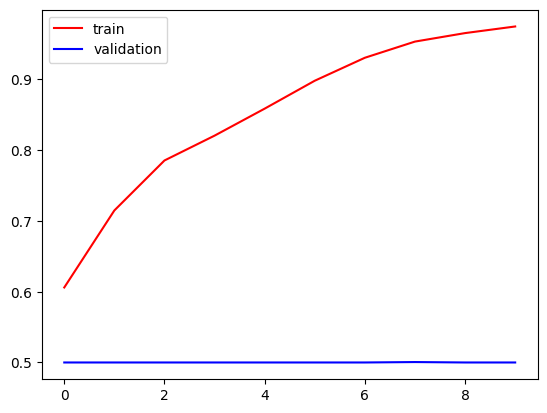

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='validation')
plt.legend()
plt.show()

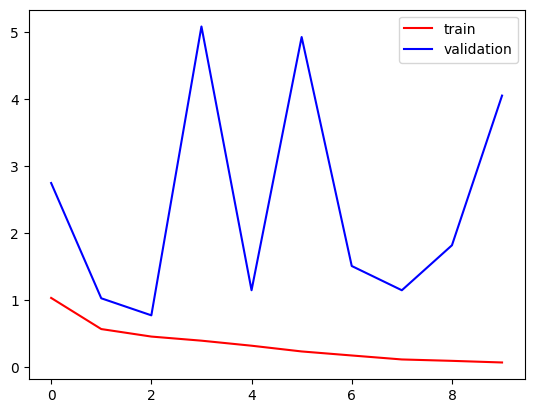

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

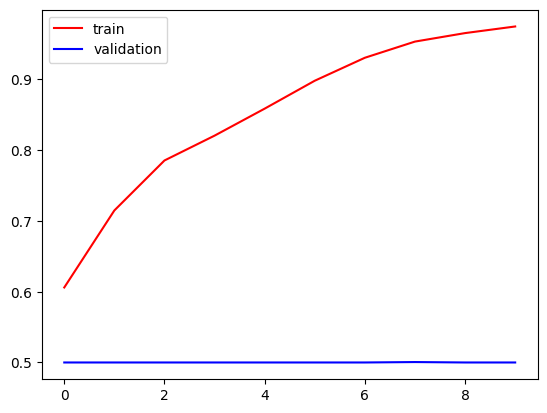

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

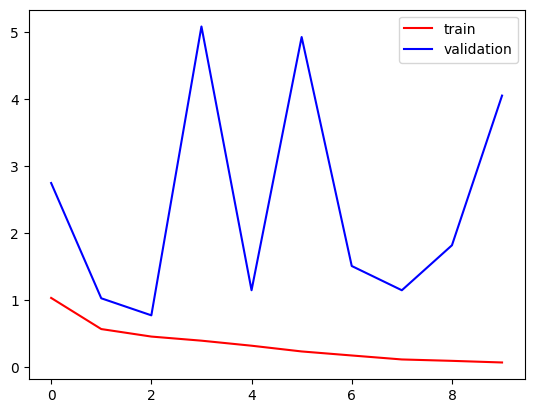

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

need to reduce complexity

add more data
reducing complexity

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread('/content/test/dogs/dog.10200.jpg')

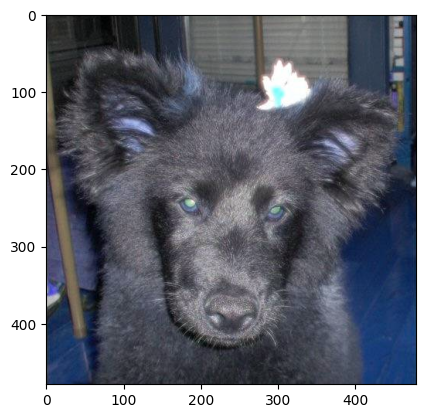

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(479, 480, 3)

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.00119274]], dtype=float32)